In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
F = len('Arkadiusz')
L = len('Kontek')

## Excercise 1 -  Generated Quantities Block

In [66]:
gen_quant = CmdStanModel(stan_file='home/code_1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [17]:
samples = gen_quant.sample(data={'M': F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [23]:
df = samples.draws_pd()
df.head()

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6],y_sim[7],y_sim[8],y_sim[9]
0,0.0,0.0,55.1232,63.0,60.0,50.0,68.0,63.0,58.0,64.0,44.0,56.0
1,0.0,0.0,120.3610,107.0,140.0,122.0,106.0,107.0,124.0,138.0,126.0,106.0
2,0.0,0.0,308.5050,299.0,305.0,306.0,325.0,325.0,303.0,331.0,303.0,293.0
3,0.0,0.0,93.9318,92.0,97.0,108.0,92.0,91.0,96.0,110.0,116.0,70.0
4,0.0,0.0,80.6490,82.0,80.0,88.0,80.0,76.0,79.0,88.0,73.0,90.0


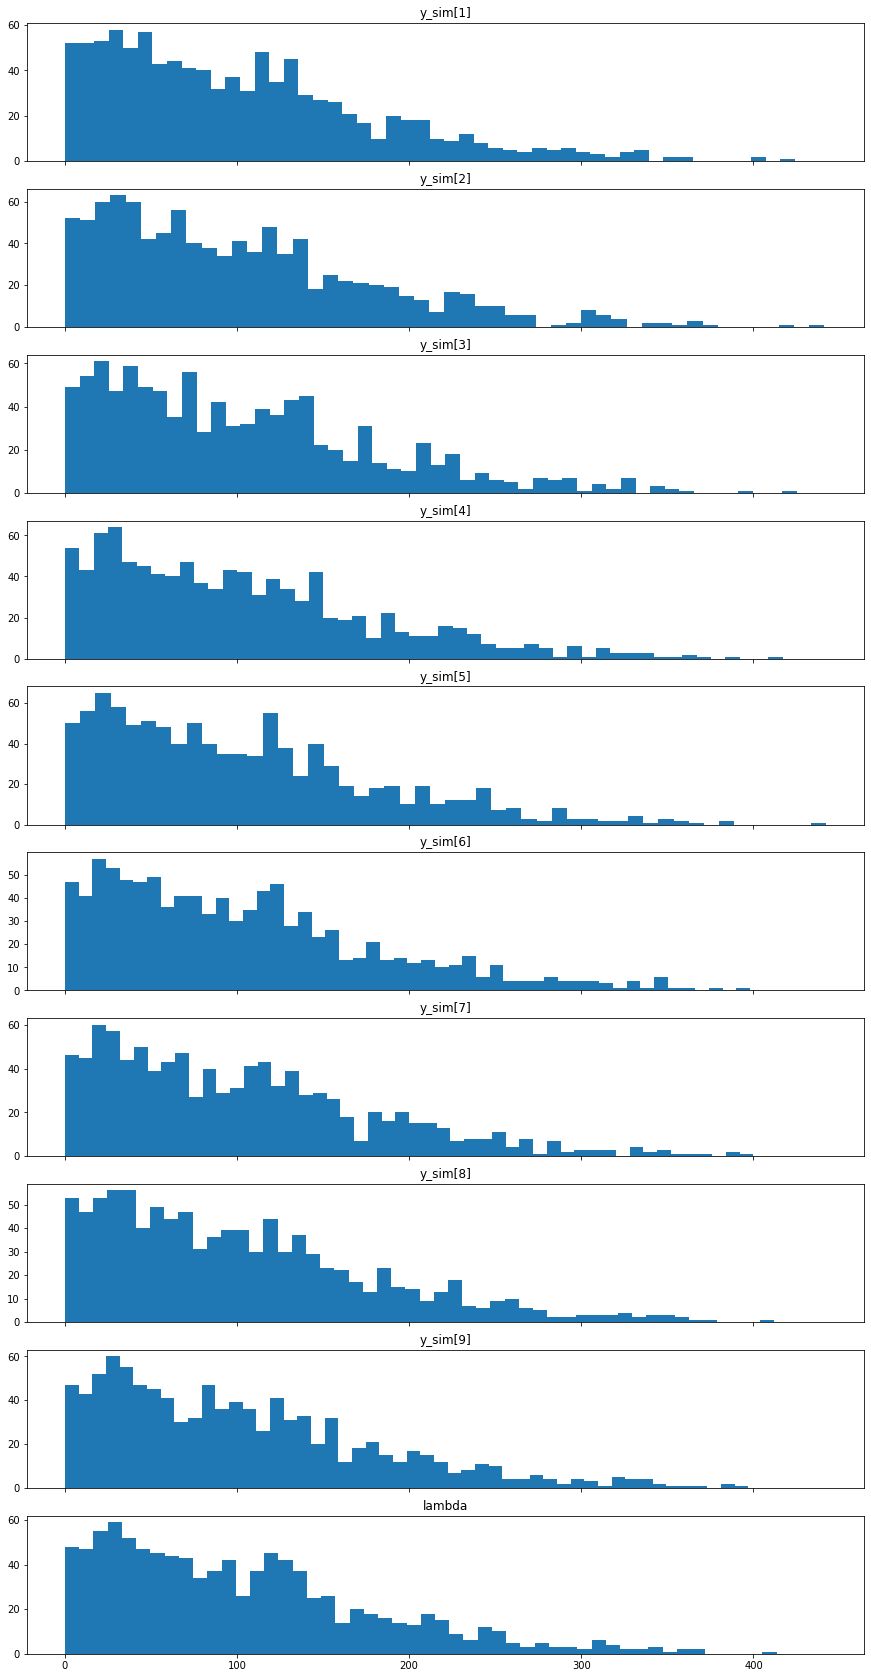

In [37]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10, 1, figsize=(15, 30), sharex=True)
bins = 50
ax1.hist(df['y_sim[1]'], bins=bins)
ax1.set_title('y_sim[1]')
ax2.hist(df['y_sim[2]'], bins=bins)
ax2.set_title('y_sim[2]')
ax3.hist(df['y_sim[3]'], bins=bins)
ax3.set_title('y_sim[3]')
ax4.hist(df['y_sim[4]'], bins=bins)
ax4.set_title('y_sim[4]')
ax5.hist(df['y_sim[5]'], bins=bins)
ax5.set_title('y_sim[5]')
ax6.hist(df['y_sim[6]'], bins=bins)
ax6.set_title('y_sim[6]')
ax7.hist(df['y_sim[7]'], bins=bins)
ax7.set_title('y_sim[7]')
ax8.hist(df['y_sim[8]'], bins=bins)
ax8.set_title('y_sim[8]')
ax9.hist(df['y_sim[9]'], bins=bins)
ax9.set_title('y_sim[9]')
ax10.hist(df['lambda'], bins=bins)
ax10.set_title('lambda')
plt.show()

## Excercise 2 - Constraints on the data 

In [40]:
bern1 = CmdStanModel(stan_file='home/code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [42]:
bern2 = CmdStanModel(stan_file='home/code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


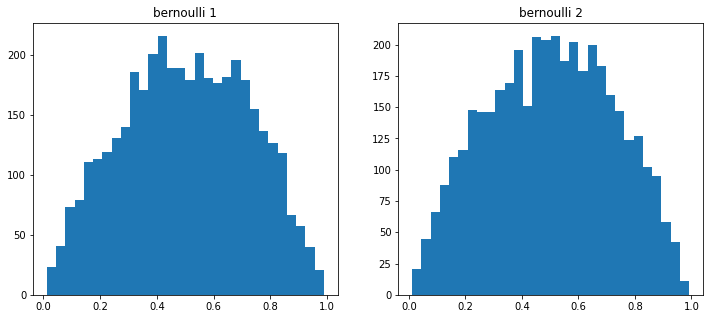

In [60]:
df1 = samp_bern1.draws_pd()
df2 = samp_bern2.draws_pd()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
bins = 30
ax1.hist(df1['theta'], bins=bins)
ax1.set_title('bernoulli 1')
ax2.hist(df2['theta'], bins=bins)
ax2.set_title('bernoulli 2')

plt.show()

## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [50]:
model_gm1 = CmdStanModel(stan_file='home/code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


INFO:cmdstanpy:compiling stan file /home/code_4.stan to exe file /home/code_4
INFO:cmdstanpy:compiled model executable: /home/code_4
INFO:cmdstanpy:created output directory: /samples
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |████▌     | 00:00 Iteration: 3000 / 7000 [ 42%]  (Sampling)



chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /samples/code_4-20230319185014_1.csv, /samples/code_4-20230319185014_2.csv, /samples/code_4-20230319185014_3.csv, /samples/code_4-20230319185014_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

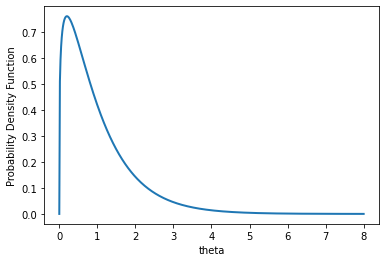

In [51]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


### Constrained parameter

In [52]:
model_gm2 = CmdStanModel(stan_file='home/code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:compiling stan file /home/code_5.stan to exe file /home/code_5
INFO:cmdstanpy:compiled model executable: /home/code_5
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▌       | 00:00 Iteration: 1500 / 7000 [ 21%]  (Sampling)


chain 1 |██████▉   | 00:00 Iteration: 4700 / 7000 [ 67%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /samples/code_5-20230319185050_1.csv, /samples/code_5-20230319185050_2.csv, /samples/code_5-20230319185050_3.csv, /samples/code_5-20230319185050_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

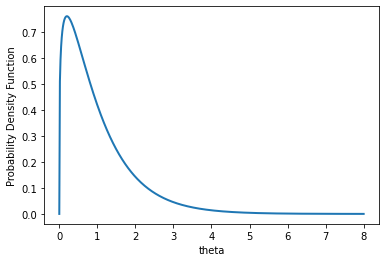

In [53]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

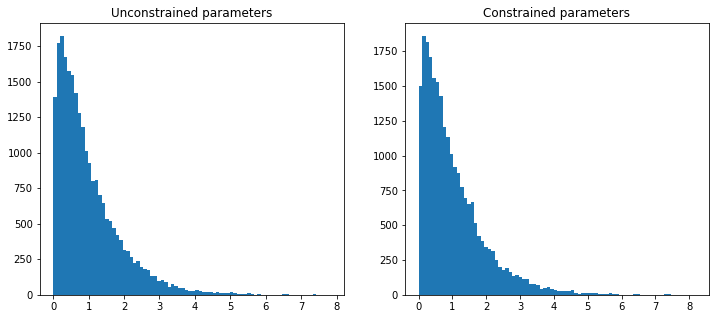

In [59]:
df1 = out_gamma1.draws_pd()
df2 = out_gamma2.draws_pd()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
bins = 80
ax1.hist(df1['theta'], bins=bins)
ax1.set_title('Unconstrained parameters')
ax2.hist(df2['theta'], bins=bins)
ax2.set_title('Constrained parameters')

plt.show()

## Excercise 4 -  Selection of parameters using equation solving



In [84]:
model_tune = CmdStanModel(stan_file='home/code_6.stan')

y0 = 3 # initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [85]:
df = tunes.draws_pd()
df.head()

,lp__,accept_stat__,sigma
0,0.0,0.0,2.91168


## Excercise 5 - different methods of defining models


In [91]:
model_samp_st = CmdStanModel(stan_file='home/code_7.stan')
model_log_target = CmdStanModel(stan_file='home/code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='home/code_9.stan')
data = {'N': F}
seed = 18092000 #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


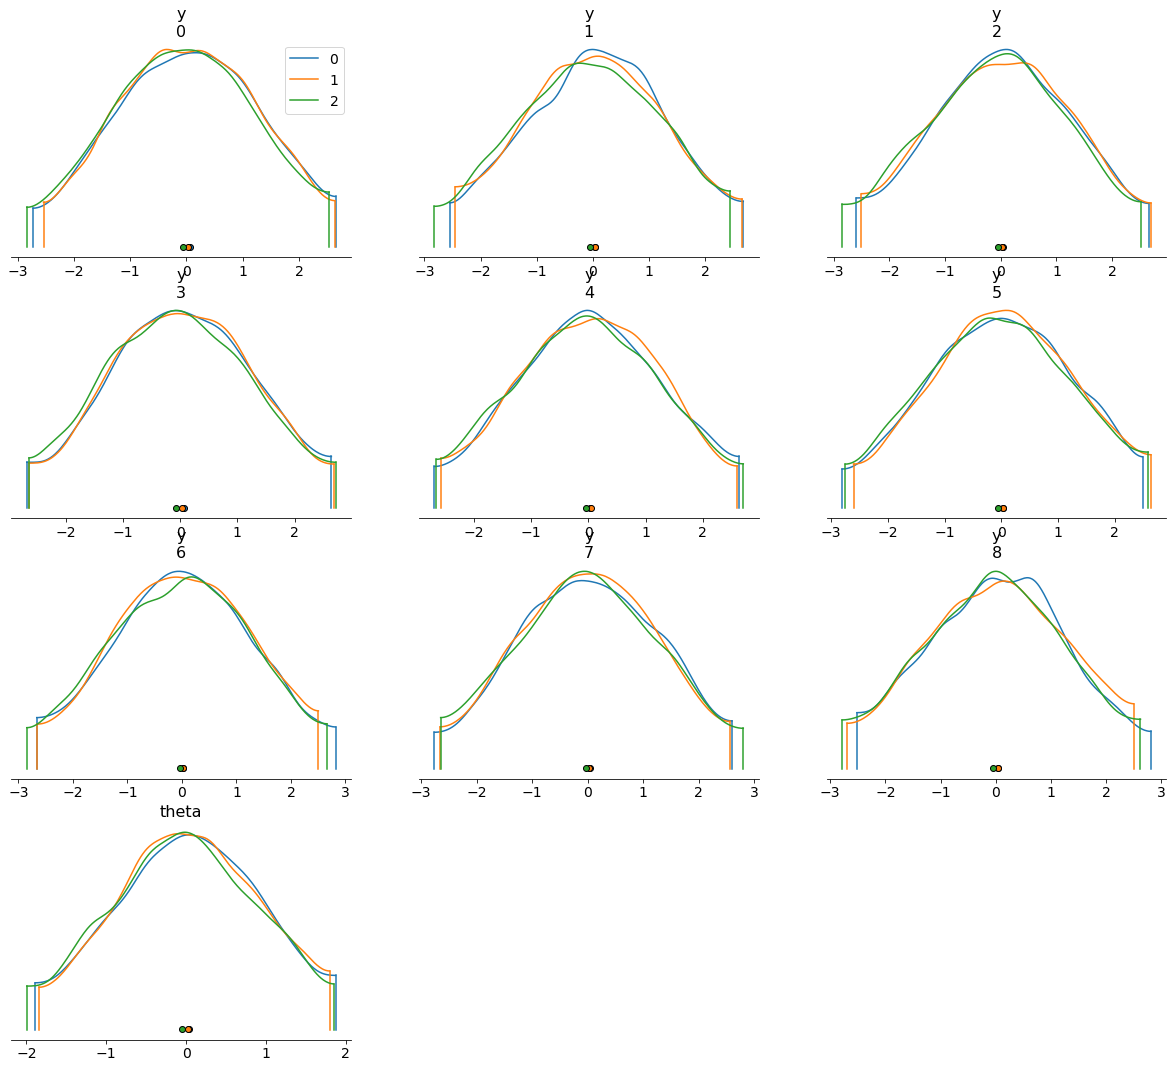

In [100]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

In [92]:
model_gq = CmdStanModel(stan_file='home/code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_2)
# investigate the output and plot histogram of mean_y variable

INFO:cmdstanpy:compiling stan file /home/code_10.stan to exe file /home/code_10
INFO:cmdstanpy:compiled model executable: /home/code_10
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/code_10.hpp /home/code_10.stan
Warning in '/home/code_10.stan', line 6, column 4: Declaration of arrays by
    placing brackets after a variable name is deprecated and will be removed
    in Stan 2.32.0. Instead use the array keyword before the type. This can
    be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DBOOST_DISABLE_ASSERTS          

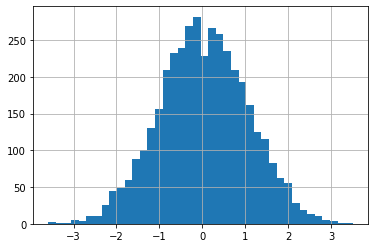

In [99]:
df = mean_of_y.draws_pd()
bins = 40
df['mean_y'].hist(bins=bins)
plt.show()